<a href="https://colab.research.google.com/github/dzisandy/Deep-Learning/blob/master/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import warnings
warnings.simplefilter("ignore")

import torch
import torch.nn.functional as F
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from PIL.Image import open
from tqdm import trange
from IPython import display

In [3]:
'''http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html , downloaded from Google Drive, using Google Drive downloader'''
!pip install googledrivedownloader
from google_drive_downloader import GoogleDriveDownloader as gdd
gdd.download_file_from_google_drive(file_id='0B7EVK8r0v71pZjFTYXZWM3FlRnM',dest_path='./data',unzip=True)


Unzipping...Done.


In [0]:
'''preprocessing data (crop to img_size), save it to root (save_root dir)'''
def preprocess(img_size, save_root):
    if not os.path.isdir(save_root):
        os.mkdir(save_root)

    transform = transforms.Compose([transforms.CenterCrop((178,178)),
                                    transforms.Resize((img_size,img_size))
                                   ])

    for i,item in enumerate(sorted(os.listdir(path='./img_align_celeba'))[0:20000]):
                                    img = open(os.path.join('./img_align_celeba', item))
                                    img = np.array(transform(img))
                                    plt.imsave(fname=os.path.join(save_root, item), arr=img)

                                    if (i % 1000) == 0:
                                        print('%d images complete' % i)
                                
                                
def save_as_npz(root_dir, out_name):
    data = []
    for i,item in enumerate(sorted(os.listdir(path=root_dir))):
        arr = (np.float32(open(os.path.join(root_dir, item)))/255).reshape(-1)
        data += [arr]
        if i % 1000 == 0:
            print(i)
    np.savez("{}.npz".format(out_name), Pictures=data)



In [0]:
'''dataset generation'''
class CelebDataset(Dataset):
    def __init__(self, train = None, transform=None):
        super(Dataset, self).__init__()
        
        if train:
            self.img = sorted(os.listdir(path='./img_align_celeba'))[:20000]
        else:
            self.img = sorted(os.listdir(path='./img_align_celeba'))[20000:21000]
        self.transform = transform

    def __len__(self):
        return len(self.img)
    
    def __getitem__(self, idx):
        img = open(os.path.join('./img_align_celeba',self.img[idx]))        
        if self.transform:
            img = self.transform(img)
        return img
    
    


In [0]:
'''here we set the data size (now 128x128), and transformation to do it'''
img_size = 64
transform = transforms.Compose([transforms.CenterCrop((178,178)),
                                transforms.Resize((img_size,img_size)),
                                transforms.ToTensor()
                               ])

In [0]:
'''validation and train Dataloaders, batchsizes to be adjusted'''
t_batch_size = 64
v_batch_size = 5

train_dataset = CelebDataset(transform = transform, train = True)
train_loader = DataLoader(train_dataset,batch_size = t_batch_size, shuffle=True)

test_dataset = CelebDataset(transform = transform)
test_loader = DataLoader(test_dataset, batch_size = v_batch_size, shuffle=False)

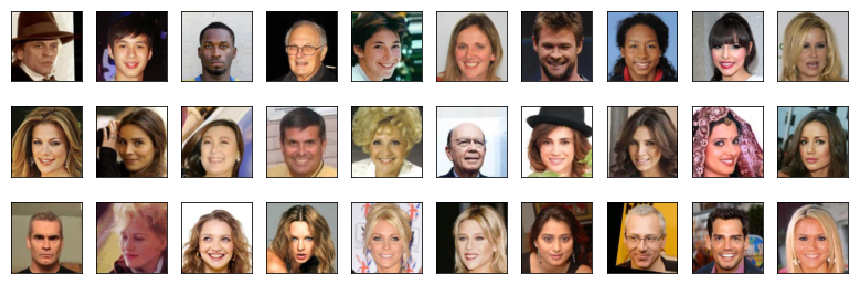

In [8]:
'''data visualization'''
for item in train_loader:
    plt.figure(figsize = (15,5))
    for i in range(30):
        plt.subplot(3,10,i+1)
        plt.imshow(transforms.ToPILImage()(item[i]))
        plt.xticks(())
        plt.yticks(())
    plt.show()
    break

In [0]:
'''usage of preprocessing data stuff and .npz saving for PRD (see HW3)'''
img_size = 64
root_dir = './celeba'
out_name = 'real'

In [10]:
preprocess(img_size, root_dir)

0 images complete
1000 images complete
2000 images complete
3000 images complete
4000 images complete
5000 images complete
6000 images complete
7000 images complete
8000 images complete
9000 images complete
10000 images complete
11000 images complete
12000 images complete
13000 images complete
14000 images complete
15000 images complete
16000 images complete
17000 images complete
18000 images complete
19000 images complete


In [11]:
save_as_npz(root_dir, out_name)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000


In [0]:
'''save resuts to G-Drive'''
from google.colab import drive
root_path = 'gdrive/My\ Drive/Colab\ Notebooks'
drive.mount('/content/gdrive')

! cp real.npz $root_path